In [191]:
import numpy as np
import os
import matplotlib.pyplot as plt
import random
import pandas as pd

## Import Digits

### Load labels train & test

In [137]:
y_train = np.loadtxt("../train_labels.txt",dtype=str)
y_test = np.loadtxt("../test_labels.txt",dtype=str)

### Load data train & test

In [138]:
filenames_train = [x for x in os.listdir("../train_voyelles") if x[0]=="v"]
filenames_train.sort()
filenames_test = [x for x in os.listdir("../test_voyelles") if x[0]=="v"]
filenames_test.sort()

In [139]:
x_train = []
for f in filenames_train:
  input = np.loadtxt("../train_voyelles/"+f, dtype='i', delimiter='\t')
  x_train.append(input)
x_train = np.asarray(x_train)

In [140]:
x_test = []
for f in filenames_test:
  input = np.loadtxt("../test_voyelles/"+f, dtype='i', delimiter='\t')
  x_test.append(input)
x_test = np.asarray(x_test)

In [141]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4500, 18, 18)
(4500,)
(500, 18, 18)
(500,)


In [142]:
for v in ['A','E','I','O','U']:
  print(v+": "+str(np.sum(y_test==v)))

A: 105
E: 108
I: 92
O: 108
U: 87


U


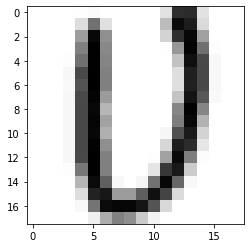

In [143]:
id = random.randint(0, len(x_test))
plt.imshow(x_test[id],cmap ="gray")
print(y_test[id])

I


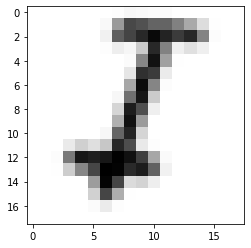

In [148]:
plt.imshow(x_test[0],cmap ="gray")
print(y_test[0])

### Reshape Train and test data for sklearn estimator

In [176]:
x_train = x_train.reshape(x_train.shape[0], -1)

In [177]:
x_test = x_test.reshape(x_test.shape[0], -1)

In [227]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [125]:
def train_kmeans(x_train, y_train, x_test, y_test, k=5):
    
    # MAKE PIPELINE W/ STANDARD SCALER AND KMEANS ESTIMATOR
    kmeans = KMeans(n_clusters=k)
    
    # FIT ON TRAIN DATA
    kmeans.fit(x_train, y_train)
    
    # PREDICT ON TEST DATA
    preds = kmeans.predict(x_test)
    
    # EVALUATION
    score1 = silhouette_score(x_train, y_train)
    print("Silhouette Score : ", score1)
    score2 = homogeneity_score(y_test, preds)
    print("Homogeneity Score : ", score2)
    
    return kmeans, preds


In [126]:
kmeans, preds = train_kmeans(x_train, y_train, x_test, y_test)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6c2e6fa820>
Traceback (most recent call last):
  File "/home/humanum/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/humanum/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/humanum/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/humanum/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


Silhouette Score :  0.05606698128902493
Homogeneity Score :  0.3570158900647452


In [181]:
kmeans.cluster_centers_

array([[254.05586592, 253.28631285, 250.98324022, ..., 252.92178771,
        254.14664804, 254.61452514],
       [254.59312321, 254.38538682, 254.40544413, ..., 254.98710602,
        254.99140401, 255.        ],
       [254.99004975, 254.99004975, 254.94527363, ..., 254.73631841,
        254.81840796, 254.8880597 ],
       [254.52817574, 254.16045845, 253.82712512, ..., 254.27889207,
        254.61413563, 254.82903534],
       [255.        , 254.99838057, 254.99433198, ..., 254.91659919,
        254.9805668 , 254.99352227]])

In [180]:
kmeans.labels_

array([3, 4, 1, ..., 3, 0, 4], dtype=int32)

In [184]:
y_test = list(y_test)

In [185]:
y_preds = list(preds)

In [195]:
zipped = list(zip(y_test, y_preds))
df = pd.DataFrame(zipped, columns=['TRUE_VALUE', 'PREDICTION'])

In [209]:
df_O = df[df['TRUE_VALUE'] == 'O']

In [213]:
len(df_O)

108

In [211]:
df_O.value_counts()

TRUE_VALUE  PREDICTION
O           4             58
            0             32
            3             12
            1              5
            2              1
dtype: int64

In [221]:
df_U = df[df['TRUE_VALUE'] == 'E']

In [222]:
df_U.value_counts()

TRUE_VALUE  PREDICTION
E           1             61
            4             18
            0             16
            3              7
            2              6
dtype: int64

In [224]:
preds_labelled = ['I' if elem == 3 else 'A' if elem == 2 else 'E' if elem == 1 else 'O' if elem == 4 else 'U' for elem in preds]

### Evaluation of predictions

In [226]:
print(metrics.classification_report(y_test, preds_labelled))

              precision    recall  f1-score   support

           A       0.88      0.79      0.83       105
           E       0.71      0.56      0.63       108
           I       0.66      0.72      0.69        92
           O       0.45      0.54      0.49       108
           U       0.33      0.34      0.34        87

    accuracy                           0.60       500
   macro avg       0.61      0.59      0.60       500
weighted avg       0.61      0.60      0.60       500



In [231]:
cm = confusion_matrix(y_test, preds_labelled, labels=['U', 'E', 'A', 'I', 'O'])

In [233]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['U', 'E', 'A', 'I', 'O'])

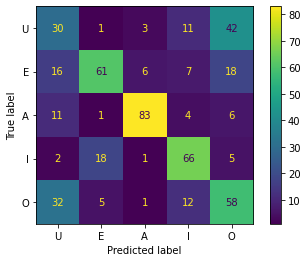

In [234]:
disp.plot()

## KNN algorithm

In [235]:
from sklearn.neighbors import KNeighborsClassifier

In [237]:
def train_knn(x_train, y_train, x_test, y_test, k=5):
    
    # MAKE PIPELINE W/ STANDARD SCALER AND KMEANS ESTIMATOR
    neigh = KNeighborsClassifier(n_neighbors=k)

    
    # FIT ON TRAIN DATA
    neigh.fit(x_train, y_train)
    
    # PREDICT ON TEST DATA
    preds = neigh.predict(x_test)
    
    # EVALUATION
    print(metrics.classification_report(y_test, preds))

    return neigh, preds

In [238]:
neigh, preds = train_knn(x_train, y_train, x_test, y_test)

              precision    recall  f1-score   support

           A       1.00      0.98      0.99       105
           E       0.97      0.96      0.97       108
           I       0.96      0.98      0.97        92
           O       0.95      0.98      0.97       108
           U       0.98      0.95      0.97        87

    accuracy                           0.97       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.97      0.97      0.97       500



In [239]:
cm = confusion_matrix(y_test, preds)

In [240]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

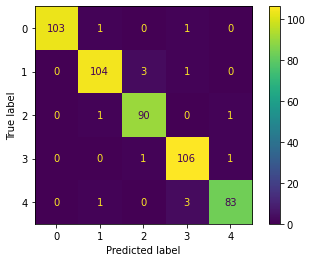

In [241]:
disp.plot()